In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
import squarify
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Reading data
symptoms_severity_df = pd.read_csv('Symptom-severity.csv')
training_df = pd.read_csv('Training.csv')
desc_df = pd.read_csv('description.csv')
dites_df = pd.read_csv('diets.csv')
medications_df = pd.read_csv('medications.csv')
precautions_df = pd.read_csv('precautions_df.csv')
symtoms_df = pd.read_csv('symtoms_df.csv')
workout_df = pd.read_csv('workout_df.csv')
symptoms_severity_df.columns, desc_df.columns, dites_df.columns, medications_df.columns, precautions_df.columns, symtoms_df.columns, workout_df.columns

(Index(['Symptom', 'weight'], dtype='object'),
 Index(['Disease', 'Description'], dtype='object'),
 Index(['Disease', 'Diet'], dtype='object'),
 Index(['Disease', 'Medication'], dtype='object'),
 Index(['Unnamed: 0', 'Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3',
        'Precaution_4'],
       dtype='object'),
 Index(['Unnamed: 0', 'Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3',
        'Symptom_4'],
       dtype='object'),
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'disease', 'workout'], dtype='object'))

In [ ]:
training_df.shape

(4920, 133)

In [ ]:
symptoms_severity_df['weight'].unique()

array([1, 3, 4, 5, 6, 2, 7])

In [ ]:
#Sevirity bins for visualization
severity_bins = {
    "Low (1-2)": symptoms_severity_df[symptoms_severity_df["weight"] <= 2].shape[0],
    "Medium (3-5)": symptoms_severity_df[(symptoms_severity_df["weight"] > 2) & (symptoms_severity_df["weight"] <= 5)].shape[0],
    "High (6-7)": symptoms_severity_df[symptoms_severity_df["weight"] > 5].shape[0],
}

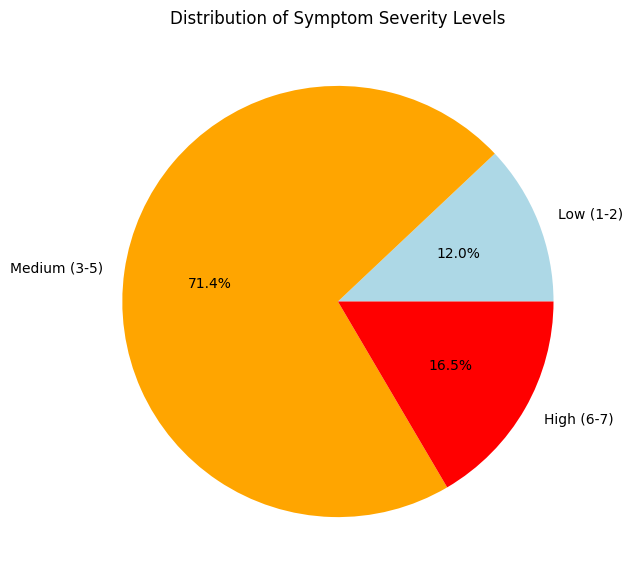

In [ ]:
#pie chart distribution
plt.figure(figsize=(7, 7))
plt.pie(severity_bins.values(), labels=severity_bins.keys(), autopct="%1.1f%%", colors=["lightblue", "orange", "red"])
plt.title("Distribution of Symptom Severity Levels")
plt.show()

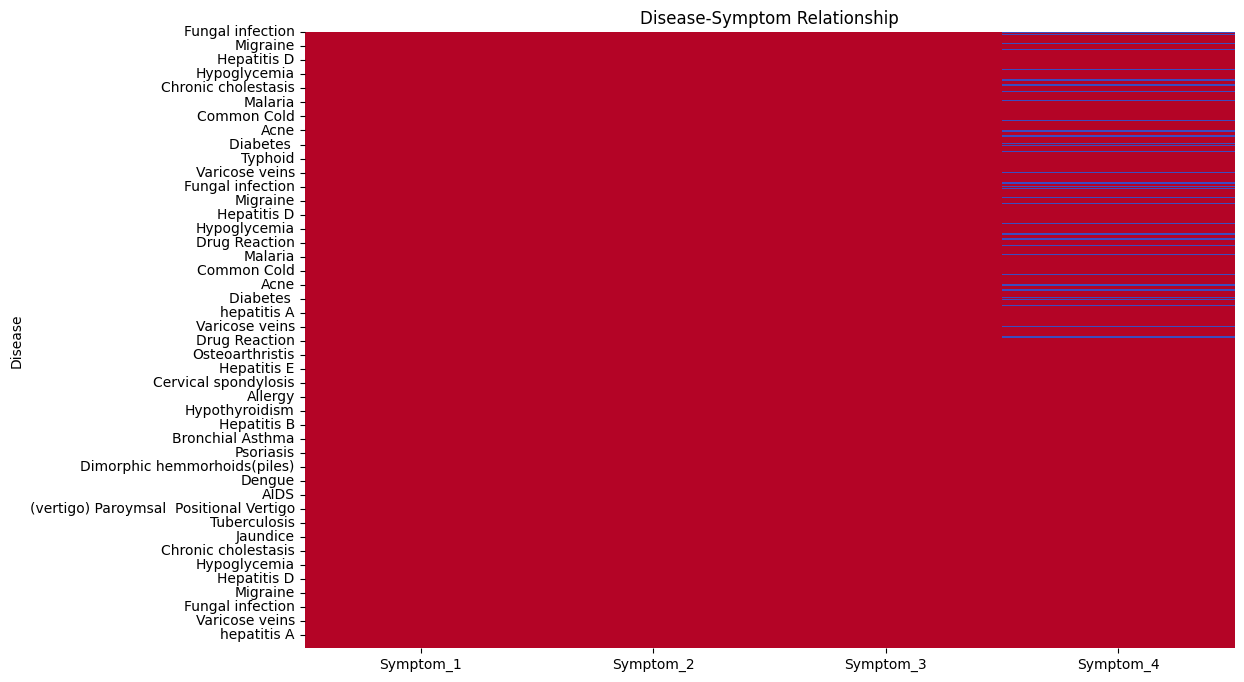

In [ ]:
# Disease-Symptom Heatmap
disease_symptom_matrix = symtoms_df.set_index("Disease").drop(columns=["Unnamed: 0"])
plt.figure(figsize=(12, 8))
sns.heatmap(disease_symptom_matrix.notnull(), cmap="coolwarm", cbar=False)
plt.title("Disease-Symptom Relationship")
plt.show()

In [ ]:
#Network Graph - Disease & Symptoms
G = nx.Graph()
for _, row in symtoms_df.iterrows():
    disease = row['Disease'][:2]
    for col in symtoms_df.columns[2:]:
        symptom = row[col]
        if pd.notna(symptom):
            G.add_edge(disease, symptom)

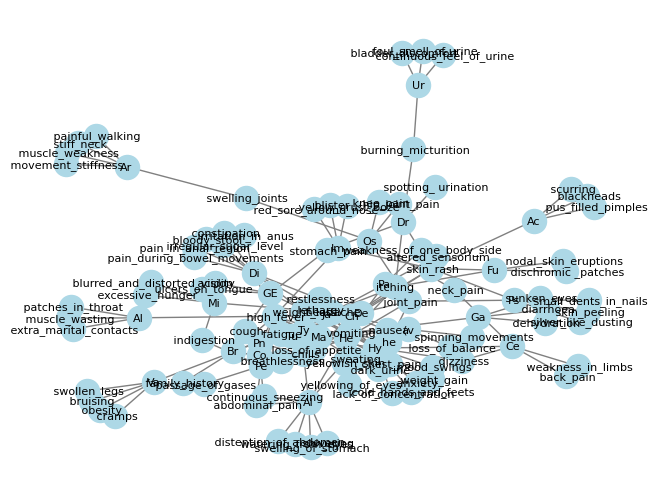

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8)
plt.title("Disease-Symptom Network Graph")
plt.show()

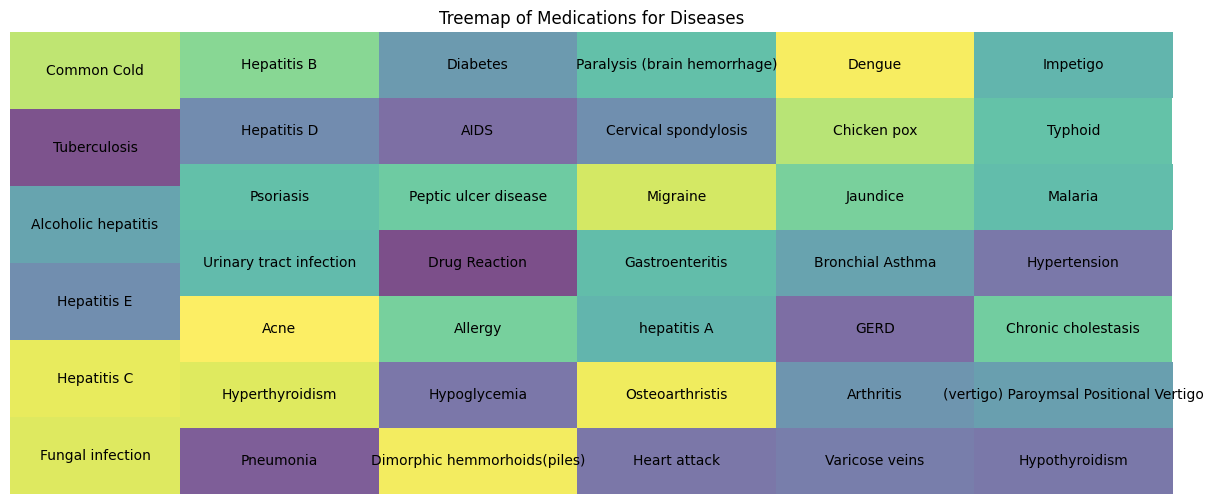

In [ ]:
# Disease-Medication Treemap
medication_counts = medications_df['Disease'].value_counts()
plt.figure(figsize=(15, 6))
squarify.plot(sizes=medication_counts.values, label=medication_counts.index, alpha=0.7)
plt.title("Treemap of Medications for Diseases")
plt.axis('off')
plt.show()

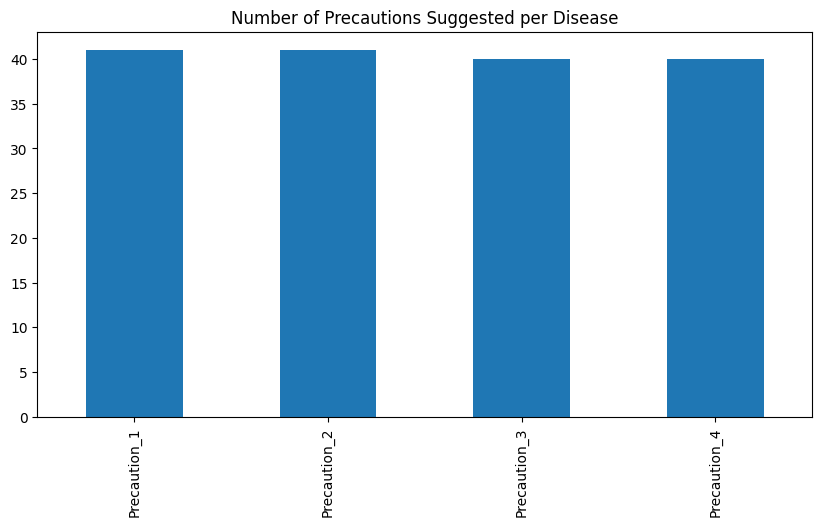

In [ ]:
#Stacked Bar Chart - Precautions
precaution_counts = precautions_df.drop(columns=['Unnamed: 0', 'Disease']).notnull().sum()
precaution_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Number of Precautions Suggested per Disease")
plt.show()

In [ ]:
training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
#Checking for null values
print(training_df.isnull().sum())

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


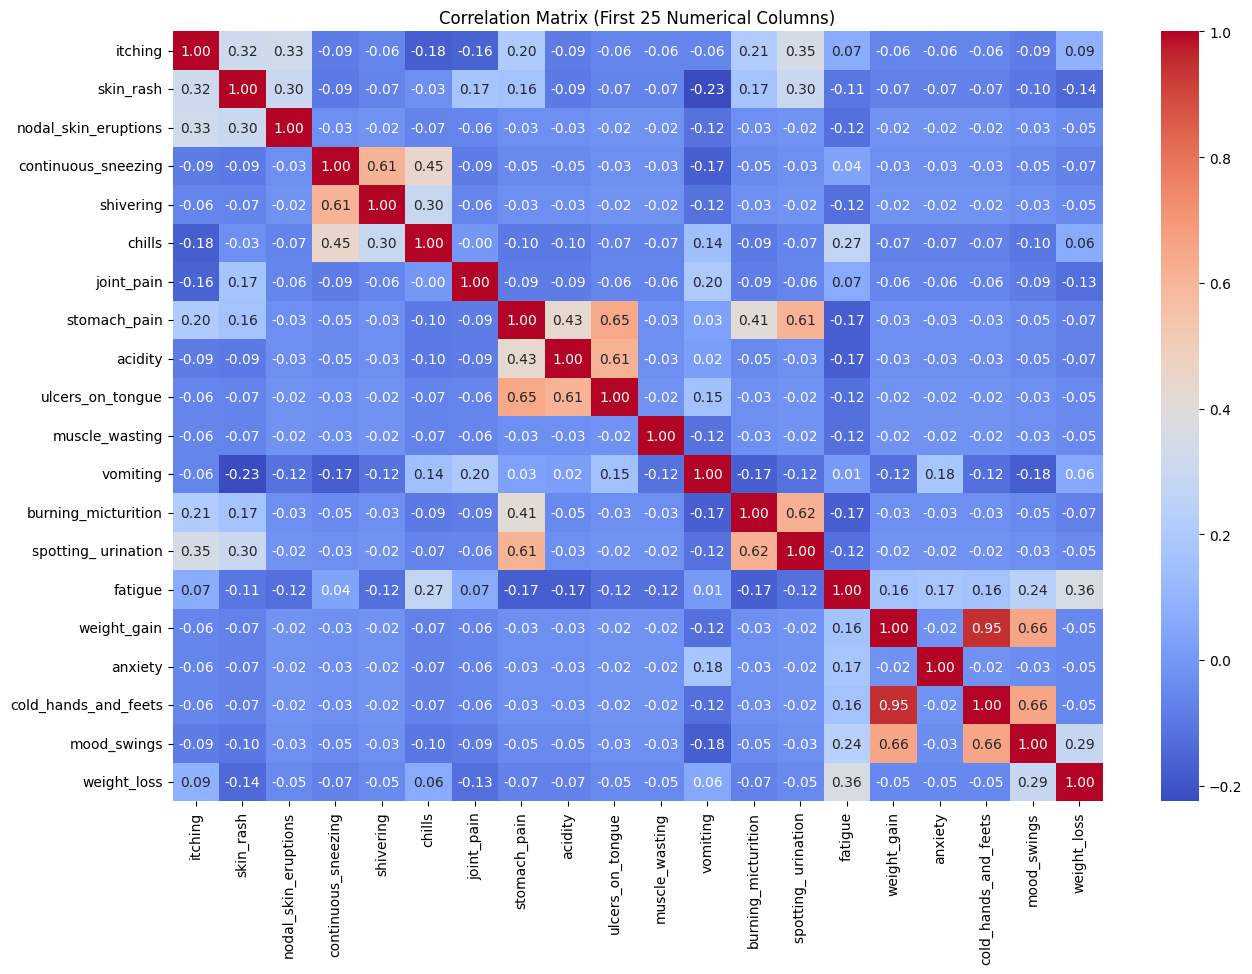

In [ ]:
# Select the first 20 numerical columns
data_20 = training_df.select_dtypes(include=np.number).columns[:20]

# Calculate the correlation matrix for the selected columns
cor_matrix_1 = training_df[data_20].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (First 25 Numerical Columns)")
plt.show()

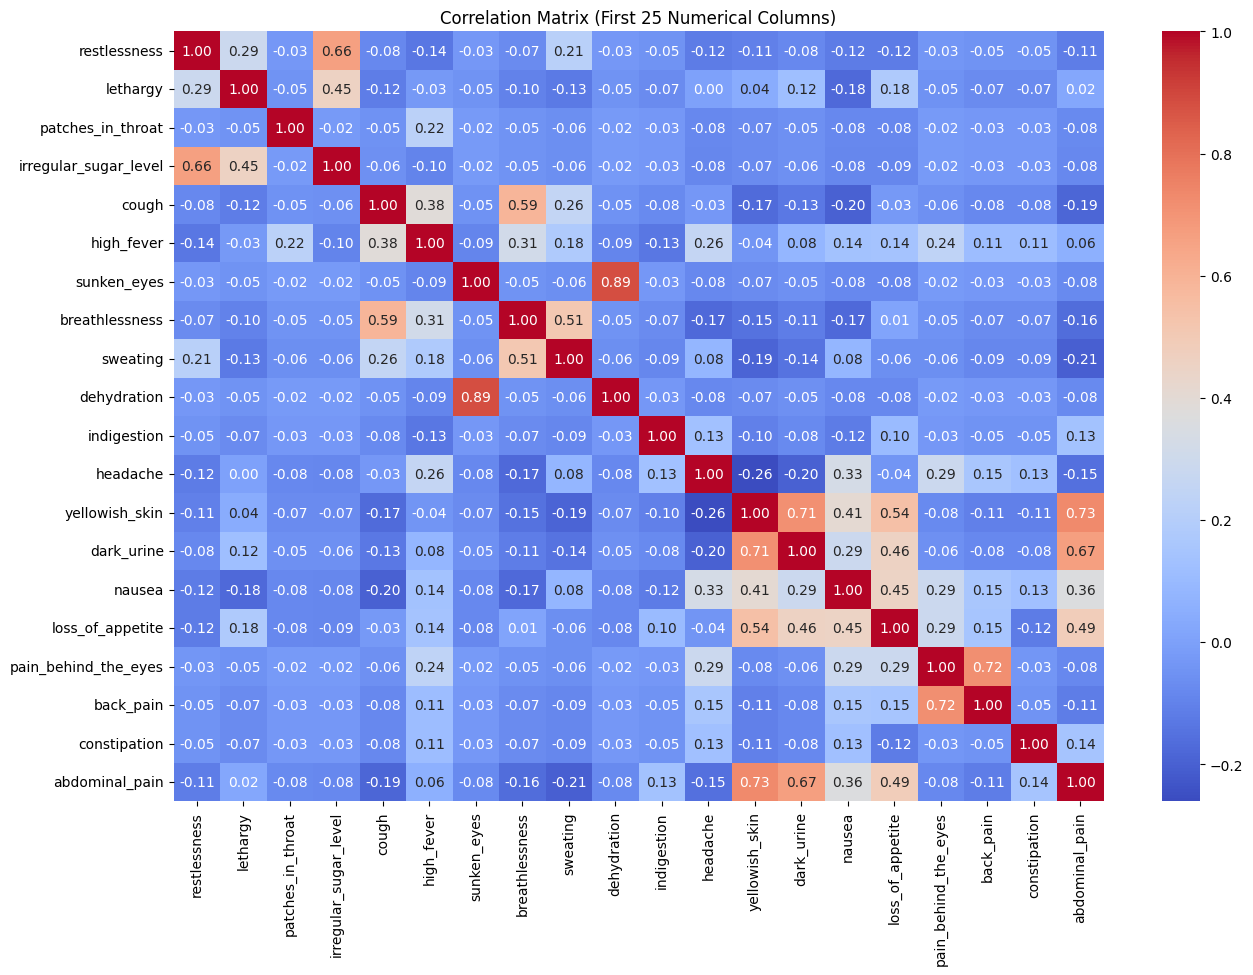

In [ ]:
# Select the first 25 numerical columns
data_20_40 = training_df.select_dtypes(include=np.number).columns[20:40]

# Calculate the correlation matrix for the selected columns
cor_matrix_1 = training_df[data_20_40].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (First 25 Numerical Columns)")
plt.show()

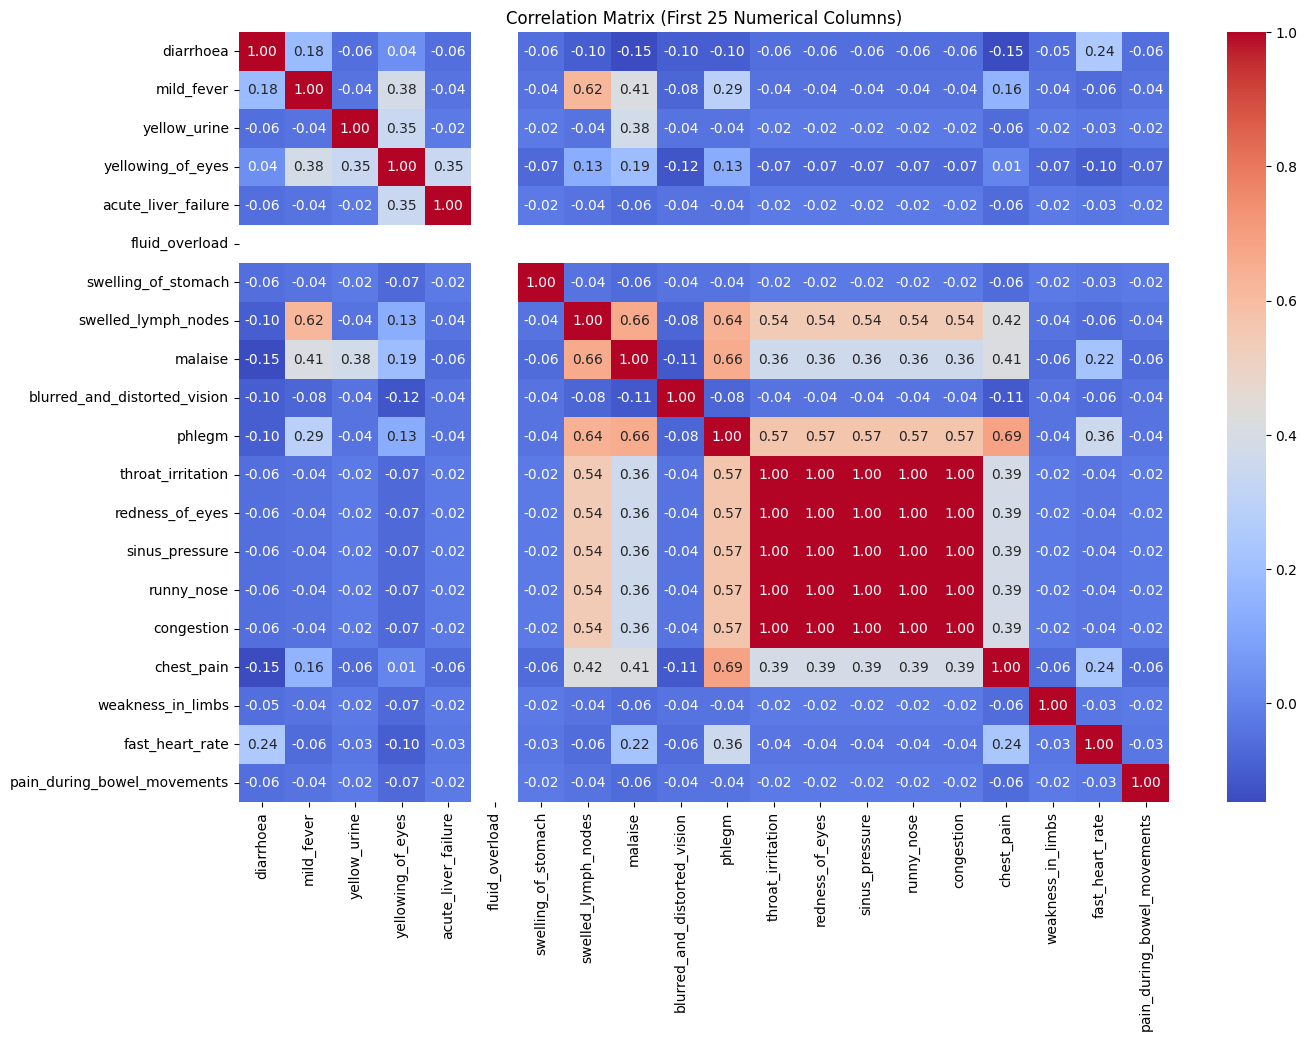

In [ ]:
# Select the first 25 numerical columns
data_40_60 = training_df.select_dtypes(include=np.number).columns[40:60]

# Calculate the correlation matrix for the selected columns
cor_matrix_1 = training_df[data_40_60].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (First 25 Numerical Columns)")
plt.show()

In [ ]:
training_df.drop('fluid_overload', axis=1, inplace=True)

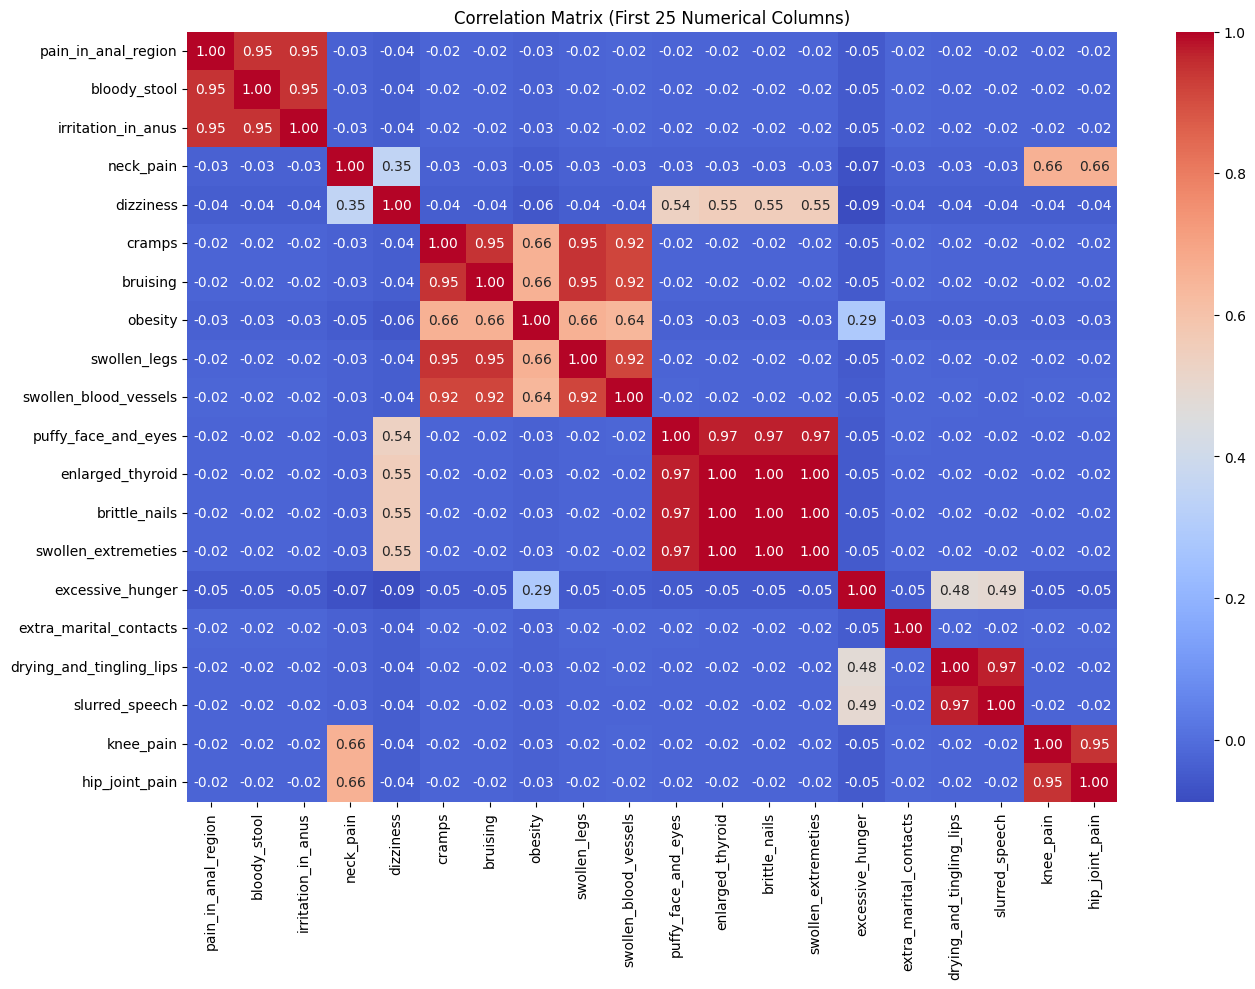

In [ ]:
# Select the first 25 numerical columns
data_60_80 = training_df.select_dtypes(include=np.number).columns[60:80]

# Calculate the correlation matrix for the selected columns
cor_matrix_1 = training_df[data_60_80].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (First 25 Numerical Columns)")
plt.show()

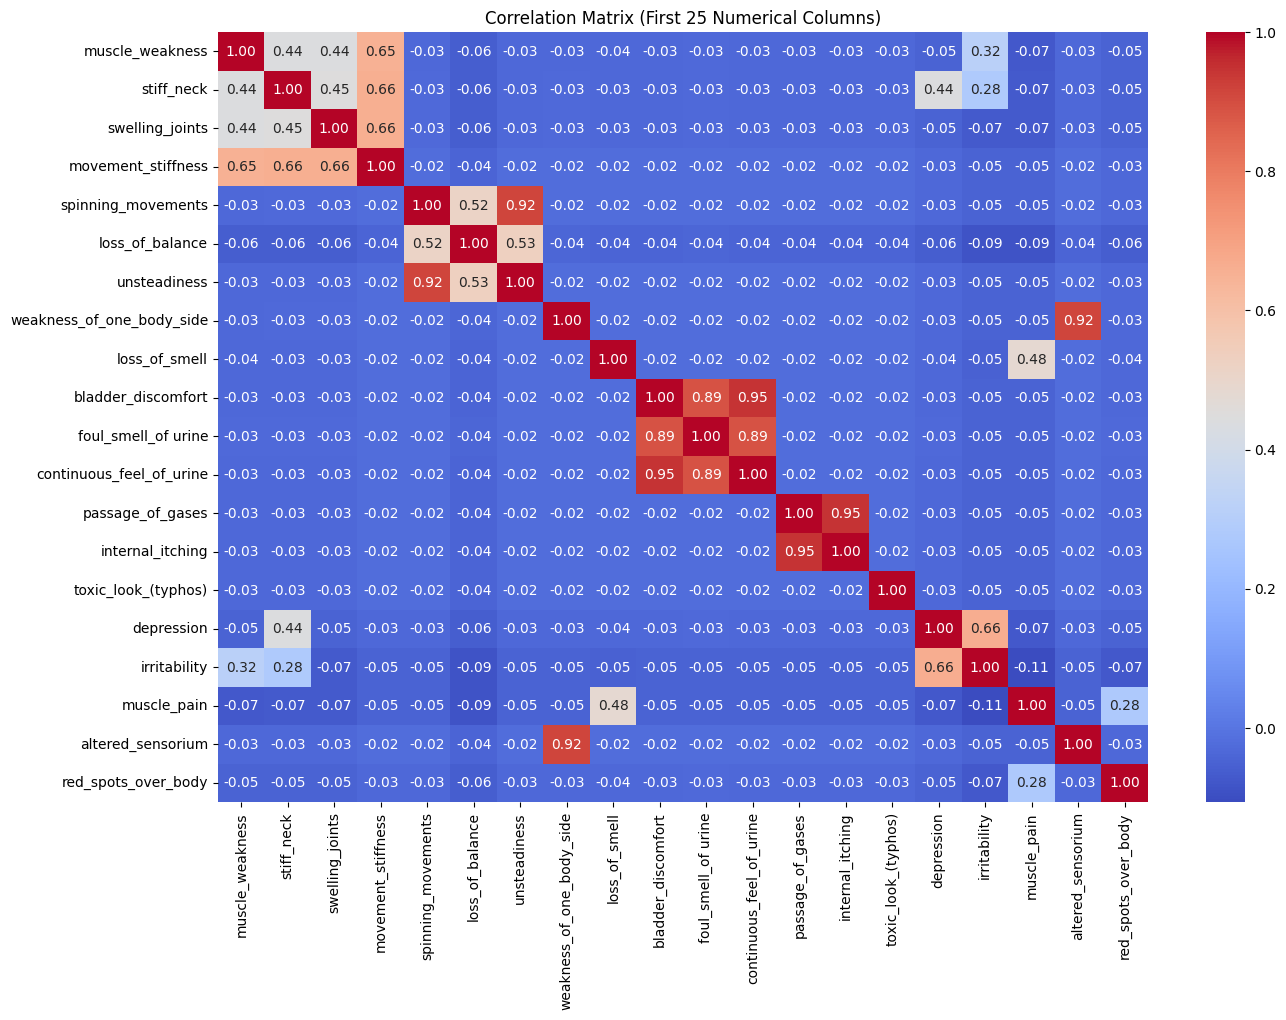

In [ ]:
# Select the first 25 numerical columns
data_80_100 = training_df.select_dtypes(include=np.number).columns[80:100]

# Calculate the correlation matrix for the selected columns
cor_matrix_1 = training_df[data_80_100].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (First 25 Numerical Columns)")
plt.show()

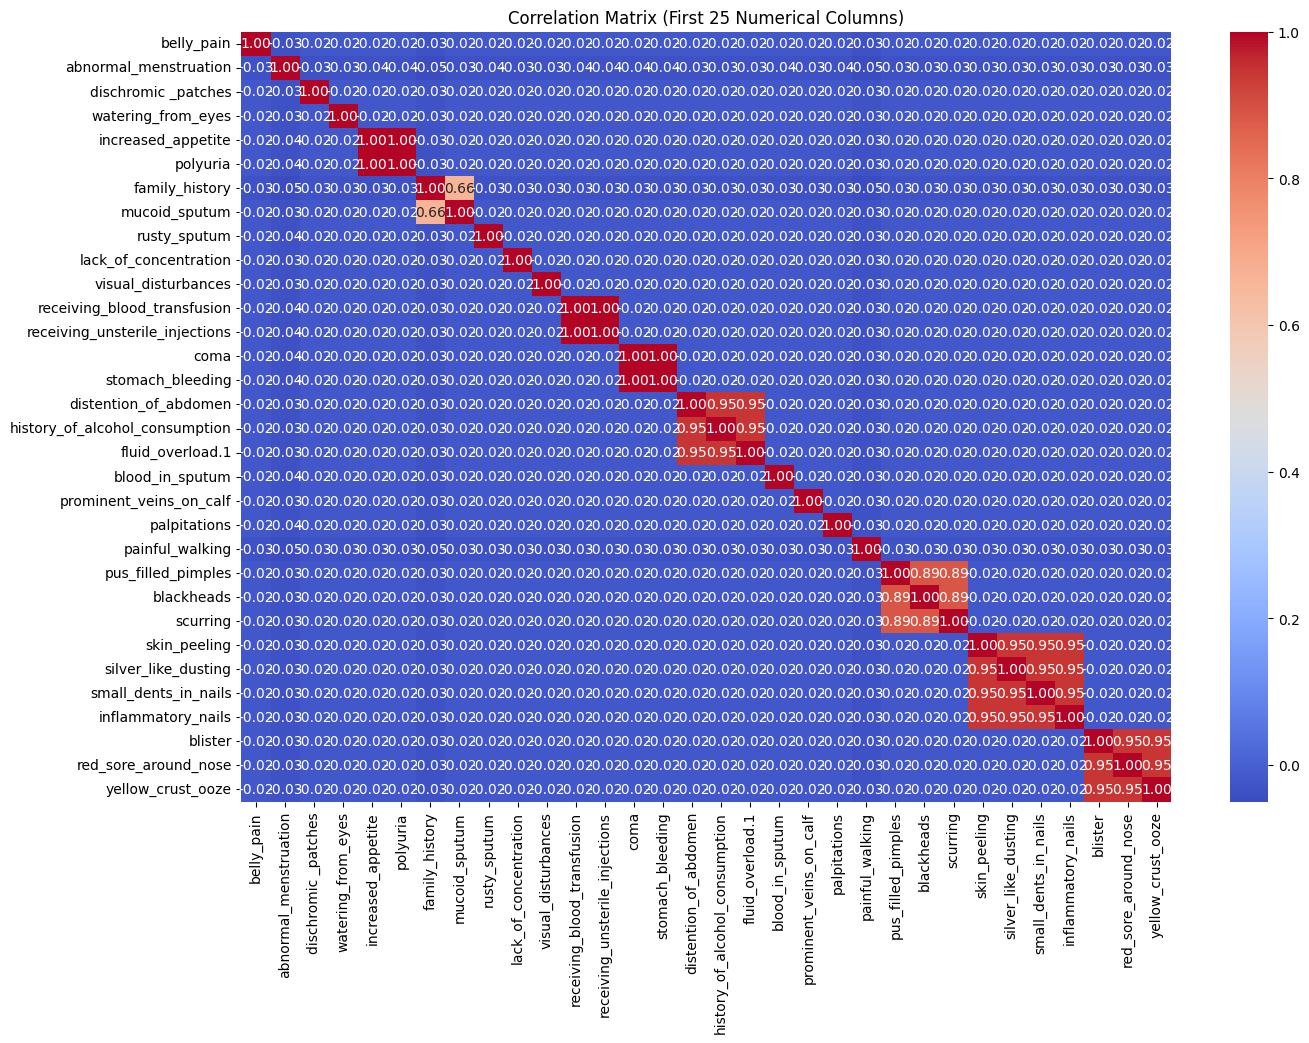

In [ ]:
# Select the first 25 numerical columns
data_100 = training_df.select_dtypes(include=np.number).columns[100:134]

# Calculate the correlation matrix for the selected columns
cor_matrix_1 = training_df[data_100].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (First 25 Numerical Columns)")
plt.show()

In [ ]:
# Compute correlation matrix
corr_matrix = training_df.select_dtypes(include=np.number).corr()

# Find highly correlated features (correlation > 0.50)
threshold = 0.50
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] > threshold]
corr_df = high_corr_pairs.sort_values(by="Correlation", ascending=False)
corr_df

,Feature 1,Feature 2,Correlation
5621,congestion,loss_of_smell,1.000000
5435,sinus_pressure,congestion,1.000000
6745,brittle_nails,swollen_extremeties,1.000000
7072,slurred_speech,palpitations,1.000000
6685,enlarged_thyroid,brittle_nails,1.000000
...,...,...,...
7387,spinning_movements,loss_of_balance,0.515392
5158,blurred_and_distorted_vision,irritability,0.512059
3159,breathlessness,sweating,0.511356
681,chills,malaise,0.510998


In [ ]:
# prompt: Using dataframe corr_df: corr matrix using Correlation feature plot

import altair as alt

# Create the correlation matrix plot
alt.Chart(corr_df).mark_rect().encode(
    x='Feature 1',
    y='Feature 2',
    color='Correlation'
).properties(
    width=1000,
    height=900,
    title='Correlation Matrix'
)


alt.Chart(...)

In [ ]:
#Selecting target variable
X = training_df.drop('prognosis', axis=1)
y = training_df['prognosis']
X.shape, y.shape

((4920, 132), (4920,))

In [ ]:
# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

Model implementation

In [ ]:
#Importing necessary libraries for implementing necessary models
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [ ]:
#SVC MODEL IMPLEMENTATION
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy" , accuracy)

Accuracy 1.0


In [ ]:
#Confusion matrix for SVC model
cm = confusion_matrix(y_test, y_pred)
print(f"{svc_model} Confusion Matrix:")
print(np.array2string(cm, separator=', '))

SVC(kernel='linear') Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


In [ ]:
#Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy" , accuracy)

Accuracy 1.0


In [ ]:
#Confusion matrix for Random forest model
cm = confusion_matrix(y_test, y_pred)
print(f"{svc_model} Confusion Matrix:")
print(np.array2string(cm, separator=', '))

SVC(kernel='linear') Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


In [ ]:
#Gradient boosing model
gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boost.fit(X_train, y_train)
y_pred = gradient_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy" , accuracy)

Accuracy 1.0


In [ ]:
#Confusion matrix for Gradient boosting model
cm = confusion_matrix(y_test, y_pred)
print(f"{gradient_boost} Confusion Matrix:")
print(np.array2string(cm, separator=', '))

GradientBoostingClassifier(random_state=42) Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


In [ ]:
#K-nearest neighbours algorithm
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy" , accuracy)

Accuracy 1.0


In [ ]:
#Confusion matrix for KNN model
cm = confusion_matrix(y_test, y_pred)
print(f"{gradient_boost} Confusion Matrix:")
print(np.array2string(cm, separator=', '))

GradientBoostingClassifier(random_state=42) Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


In [ ]:
#Multinominal model
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train, y_train)
y_pred = multinomial_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy" , accuracy)

Accuracy 1.0


In [ ]:
#Confusion matrix for Multinominal model
cm = confusion_matrix(y_test, y_pred)
print(f"{gradient_boost} Confusion Matrix:")
print(np.array2string(cm, separator=', '))

GradientBoostingClassifier(random_state=42) Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


In [ ]:
#Single prediction for Multinominal model
# save svc
import pickle
pickle.dump(random_forest,open('random_forest.pkl','wb'))
# load model
rf = pickle.load(open('svc.pkl','rb'))

In [ ]:
# test 1:
print("predicted disease :",random_forest.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# test 2:
print("predicted disease :",random_forest.predict(X_test.iloc[63].values.reshape(1,-1)))
print("Actual Disease :", y_test[63])

predicted disease : [35]
Actual Disease : 35


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Gathering all symptoms and diseases list
symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4,
                 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9,
                 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14,
                 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20,
                 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26,
                 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33,
                 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39,
                 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45,
                 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51,
                 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58,
                 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65,
                 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72,
                 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78,
                 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84,
                 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90,
                 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96,
                 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102,
                 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109,
                 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114,
                 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119,
                 'palpitations': 120, 'painful_walking': 121,'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126,
                 'small_dents_in_nails': 127,'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ',
                 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)',
                 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C',
                 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia',
                 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia',
                 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}


In [ ]:
# A helper function to get discription about disease
def helper(dis):
    desc = desc_df[desc_df['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions_df[precautions_df['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications_df[medications_df['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = dites_df[dites_df['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout_df[workout_df['disease'] == dis] ['workout']

    return desc,pre,med,die,wrkout

In [ ]:
# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[random_forest.predict([input_vector])[0]]

In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)
print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)

Enter your symptoms.......itching
=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(">>>>>>>>>>>>>>>>>>>>>>>>----- precautions -----<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print(">>>>>>>>>>>>>>>>>>>>>>>>----- medications -----<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print(">>>>>>>>>>>>>>>>>>>>>>>>----- workout-----<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print(">>>>>>>>>>>>>>>>>>>>>>>>----- diets-----<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

>>>>>>>>>>>>>>>>>>>>>>>>----- precautions -----<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
>>>>>>>>>>>>>>>>>>>>>>>>----- medications -----<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
>>>>>>>>>>>>>>>>>>>>>>>>----- workout-----<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
>>>>>>>>>>>>>>>>>>>>>>>>----- diets-----<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
